In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardetection/video.mp4
/kaggle/input/cardetection/car/README.dataset.txt
/kaggle/input/cardetection/car/README.roboflow.txt
/kaggle/input/cardetection/car/data.yaml
/kaggle/input/cardetection/car/valid/labels/000825_jpg.rf.5217db7b554510a418092e5f2aa43864.txt
/kaggle/input/cardetection/car/valid/labels/001638_JPG_jpg.rf.2a3d2a331eb8c9bf6afc868c6da103c8.txt
/kaggle/input/cardetection/car/valid/labels/road672_png.rf.399722f8bd34dc5991633bbbe681cc47.txt
/kaggle/input/cardetection/car/valid/labels/00004_00037_00010_png.rf.2d548b82f656367528a9b69d5b6b82cf.txt
/kaggle/input/cardetection/car/valid/labels/00014_00009_00012_png.rf.02ffbac072397fe4f36979ba80f74fb9.txt
/kaggle/input/cardetection/car/valid/labels/00014_00010_00001_png.rf.68c586d3ac58ed9ad2b5b51c2702b4cf.txt
/kaggle/input/cardetection/car/valid/labels/00000_00003_00002_png.rf.76d9ce9f361d1b20eb1b0d5c4d9356b7.txt
/kaggle/input/cardetection/car/valid/labels/road359_png.rf.c4125f36b26194a2c30d623150bf73bf.txt
/kaggle/inp

## <b>1 <span style='color:#e61227'>|</span> Install And Import Essential Libreries</b> 


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.6/913.6 kB 15.7 MB/s eta 0:00:00a 0:00:01


In [4]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

## <b>2 <span style='color:#e61227'>|</span> Dataset</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>2.1 |</span></b> Show Original Images Before Detect </b></p>
</div>

2.1.1. Show Some Images From TrainSet

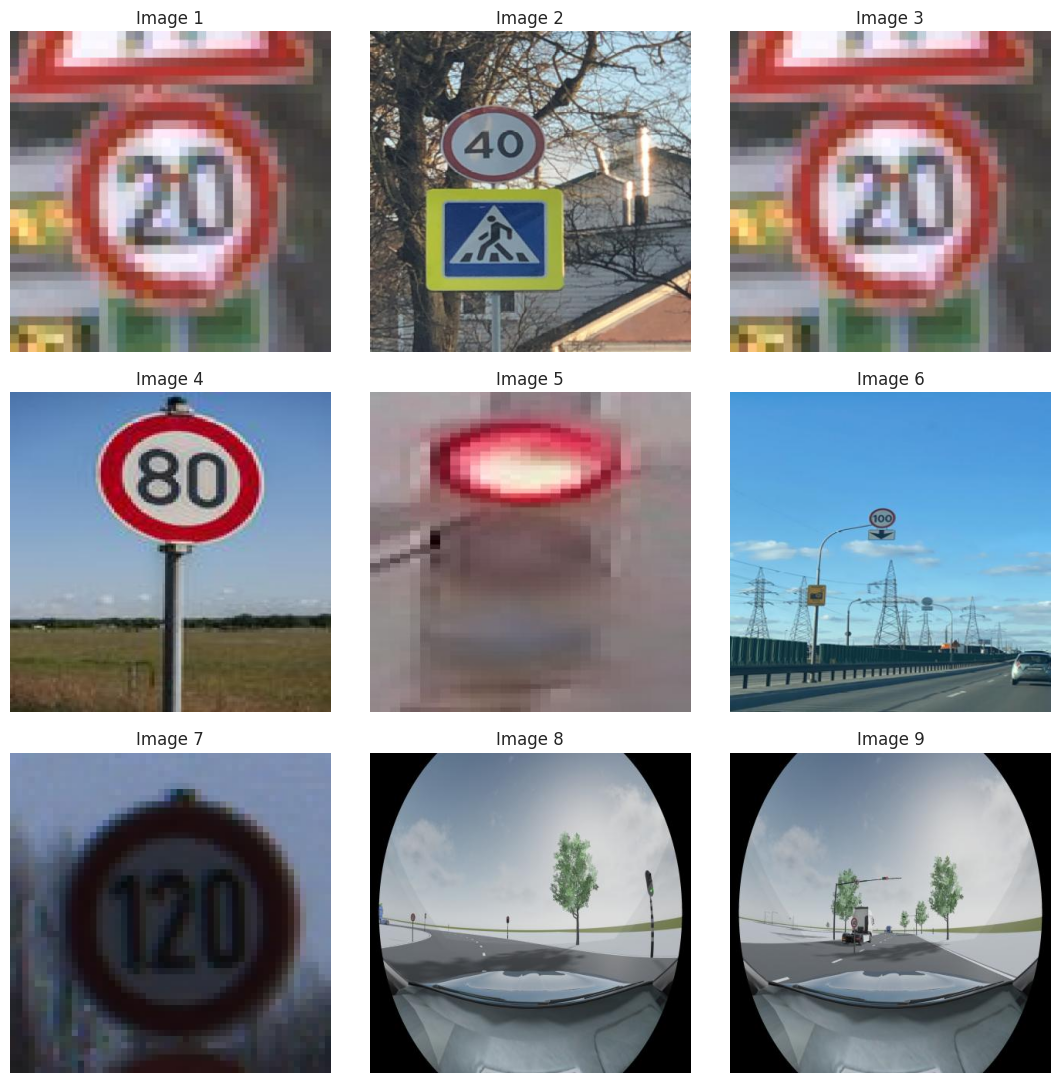

In [5]:
Image_dir = '/kaggle/input/cardetection/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

2.1.2. Get Shape Of An Image For Using In Training Step

In [6]:
# Get the size of the image
image = cv2.imread("/kaggle/input/cardetection/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


## <b>3 <span style='color:#e61227'>|</span> Try Pre-trained YOLOv8 For Detect Traffic Signs  </b>

100%|██████████| 6.25M/6.25M [00:00<00:00, 217MB/s]



image 1/1 /kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 7.9ms
Speed: 11.4ms preprocess, 7.9ms inference, 69.9ms postprocess per image at shape (1, 3, 640, 640)


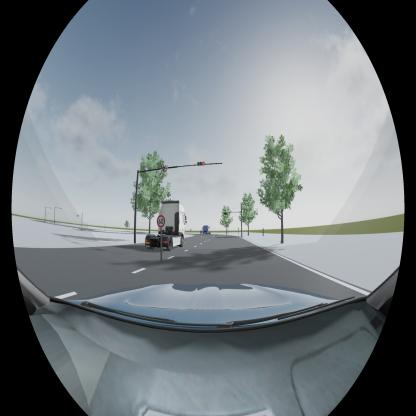

In [7]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "/kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

## <b>4 <span style='color:#e61227'>|</span> YOLOv8-Based Traffic Signs Detection Model</b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>4.1 |</span></b> Model Training Using Customized Dataset Of Traffic Signs </b></p>
</div>
        
***Mean Average Precision (mAP)*** is a metric used to evaluate the effectiveness of object detection algorithms in identifying and locating objects within images. It takes into account both precision and recall across different categories. By calculating the Average Precision (AP) for each category and taking the average, mAP provides an overall assessment of the algorithm's performance.

If the obtained mAP after the final epoch is not satisfactory, there are several options available to improve the results:
- Extending the training process by increasing the number of **epochs**: Training for more epochs allows the model to learn more patterns and potentially improve its performance. You can specify a higher value for the --epochs argument when running the training command.
- Experimenting with different **parameter values**: You can try adjusting various parameters to see if they have a positive impact on the results. Some parameters to consider are:
- **Batch Size:** Changing the batch size can affect the convergence and generalization of the model. You can modify the --batch-size argument to find an optimal value.
- **Initial Learning Rate (lr0)**: The initial learning rate determines the step size at the beginning of the training process. You can tune the --lr0 parameter to control how quickly the model learns.
- **Learning Rate Range (lrf)**: The learning rate range determines the range of learning rates used during the training. Experimenting with different values for --lrf can help find a better learning rate schedule.
- **Selecting a different optimizer**: The optimizer is responsible for updating the model's parameters based on the calculated gradients. Changing the optimizer can sometimes lead to better convergence and results. Ultralytics YOLOv8 supports different optimizers such as SGD, Adam, and RMSprop. You can try using a different optimizer by modifying the --optimizer argument.

For more details on resuming interrupted trainings and additional training options, you can refer to the Ultralytics YOLOv8 documentation.
        
In order to optimize the performance of the model, we have conducted experiments with different parameter values and optimizers. During the training phase, I explored various combinations of epochs, batch sizes, initial learning rates (lr0), and dropout values. The following values were used for experimentation:

- Epochs: ***10***, ***50***, ***100***
- Batch sizes: ***8***, ***16***, ***32***, ***64***
- Initial learning rates (lr0): ***0.001***, ***0.0003***, ***0.0001***
- Dropout: ***0.15***, ***0.25***

Furthermore, we have evaluated the model's performance using different optimizers, including **Adam**, **SGD**, and **auto**. By employing these optimizers, we aimed to assess their impact on the model's convergence and overall results.

After rigorous experimentation and training, we are pleased to present the results of our findings. The performance of the YOLOv8 model was assessed based on various metrics, including Mean Average Precision (mAP). 


***4.2 Training Step***

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>4.2.1 |</span></b> Create yaml file for train the model </b></p>
</div>

In [5]:
# Define the content of the YAML file
yaml_content = """
train: /kaggle/input/cardetection/car/train
val: /kaggle/input/cardetection/car/valid

nc: 15
names: ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']
"""

# Save the YAML file
with open('/kaggle/working/train_data.yaml', 'w') as f:
    f.write(yaml_content)

print("train_data.yaml file created successfully.")


train_data.yaml file created successfully.


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>4.2.2 |</span></b> Train the model with some parameters</b></p>
</div>

In [10]:
# Load YOLO model
Final_model = YOLO('yolov8n.pt')

# Train with updated settings
Result_Final_model = Final_model.train(
    data="/kaggle/working/train_data.yaml",
    epochs=50,                  # Maximum epochs
    patience=7,                 # Early stopping patience
    batch=16,                   # Batch size
    optimizer='AdamW',          # Optimizer
    lr0=0.001,                  # Learning rate (reduced for safety)
    imgsz=640,                  # Image size
    freeze=10,                  # Freeze first 10 layers (fine-tuning classifier)
    project='runs',             # Save results to 'runs/'
    name='classifier_train',    # Monitor validation loss
    workers=12,                 # Number of CPU workers
)

Ultralytics 8.3.68 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/train_data.yaml, epochs=50, time=None, patience=7, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=12, project=runs, name=classifier_train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:03<00:00, 896.80it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 847.81it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.


Plotting labels to runs/classifier_train2/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classifier_train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.29G     0.6779     0.9101      1.077         16        640: 100%|██████████| 221/221 [00:33<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.44it/s]

                   all        801        944      0.892      0.807      0.887      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.16G     0.6663     0.8673       1.06         27        640: 100%|██████████| 221/221 [00:32<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.52it/s]

                   all        801        944      0.916      0.776      0.873      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.15G      0.677     0.8909      1.057         19        640: 100%|██████████| 221/221 [00:32<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.59it/s]

                   all        801        944       0.89      0.792      0.886      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.16G     0.6876     0.9188       1.06         16        640: 100%|██████████| 221/221 [00:33<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.25it/s]

                   all        801        944      0.881      0.792      0.886      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.15G     0.6634     0.8914      1.046         21        640: 100%|██████████| 221/221 [00:32<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.53it/s]

                   all        801        944      0.909      0.792      0.897      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.15G     0.6585     0.8642      1.048         26        640: 100%|██████████| 221/221 [00:33<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.46it/s]

                   all        801        944      0.859      0.816      0.891      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.15G     0.6539     0.8442      1.042         22        640: 100%|██████████| 221/221 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.61it/s]

                   all        801        944      0.893       0.82      0.899      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.15G     0.6477     0.8392      1.034         23        640: 100%|██████████| 221/221 [00:32<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.65it/s]

                   all        801        944      0.882      0.837      0.902      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.15G     0.6461     0.8422      1.034         27        640: 100%|██████████| 221/221 [00:32<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.42it/s]

                   all        801        944      0.879      0.835      0.911      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.15G     0.6341     0.8156      1.031         21        640: 100%|██████████| 221/221 [00:32<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.64it/s]

                   all        801        944      0.908      0.821      0.908      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.15G     0.6307     0.7871      1.026         22        640: 100%|██████████| 221/221 [00:31<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.67it/s]

                   all        801        944      0.916      0.815      0.906      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.15G     0.6314     0.7881      1.028         32        640: 100%|██████████| 221/221 [00:31<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.62it/s]


                   all        801        944      0.935      0.835      0.919      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.15G     0.6338     0.7767      1.022         23        640: 100%|██████████| 221/221 [00:32<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.76it/s]


                   all        801        944       0.92      0.826      0.911      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.15G      0.615     0.7538      1.017         21        640: 100%|██████████| 221/221 [00:31<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.62it/s]

                   all        801        944      0.931      0.845      0.922      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.15G     0.6165     0.7657      1.018         24        640: 100%|██████████| 221/221 [00:31<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.44it/s]

                   all        801        944      0.935      0.856      0.933      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.15G     0.6264     0.7554      1.022         30        640: 100%|██████████| 221/221 [00:33<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.49it/s]

                   all        801        944      0.933      0.834      0.922      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.15G     0.6189     0.7459      1.014         16        640: 100%|██████████| 221/221 [00:35<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  5.08it/s]

                   all        801        944      0.939      0.837      0.932      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.15G     0.6195     0.7611      1.021         20        640: 100%|██████████| 221/221 [00:34<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.46it/s]

                   all        801        944      0.911      0.858      0.927       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.15G     0.5983      0.721      1.005         22        640: 100%|██████████| 221/221 [00:35<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.99it/s]

                   all        801        944      0.905      0.858      0.921      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.16G     0.5992     0.7161      1.008         22        640: 100%|██████████| 221/221 [00:35<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.24it/s]

                   all        801        944      0.921      0.864      0.933      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.15G     0.5948     0.7228      1.004         22        640: 100%|██████████| 221/221 [00:35<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.46it/s]

                   all        801        944      0.911      0.846      0.926      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.15G     0.5991     0.7086      1.007         26        640: 100%|██████████| 221/221 [00:34<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.36it/s]

                   all        801        944      0.939      0.839      0.921      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.15G     0.5924     0.7264      1.008         21        640: 100%|██████████| 221/221 [00:34<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.29it/s]

                   all        801        944      0.922      0.866      0.931      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.15G     0.5925     0.6939      1.002         28        640: 100%|██████████| 221/221 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.61it/s]

                   all        801        944      0.947      0.868      0.939      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.15G     0.5835     0.6809     0.9926         19        640: 100%|██████████| 221/221 [00:32<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.49it/s]

                   all        801        944      0.934      0.864      0.935      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.16G     0.5862     0.6815     0.9949         21        640: 100%|██████████| 221/221 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.61it/s]

                   all        801        944      0.942      0.859      0.935       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.15G     0.5811     0.6788     0.9959         23        640: 100%|██████████| 221/221 [00:32<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.60it/s]

                   all        801        944      0.913      0.875      0.936      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.15G     0.5868     0.6826     0.9974         17        640: 100%|██████████| 221/221 [00:32<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.32it/s]

                   all        801        944      0.927      0.865       0.93      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.15G     0.5662     0.6485     0.9842         28        640: 100%|██████████| 221/221 [00:33<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.57it/s]

                   all        801        944      0.901      0.876      0.936      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.15G     0.5722     0.6672     0.9907         20        640: 100%|██████████| 221/221 [00:33<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.44it/s]

                   all        801        944      0.927      0.842      0.923      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.15G     0.5643     0.6466     0.9891         21        640: 100%|██████████| 221/221 [00:34<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.33it/s]

                   all        801        944       0.94      0.858      0.937      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.15G     0.5646     0.6463     0.9847         29        640: 100%|██████████| 221/221 [00:33<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.46it/s]

                   all        801        944      0.912      0.881      0.941      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.15G     0.5772     0.6726     0.9947         22        640: 100%|██████████| 221/221 [00:34<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.27it/s]

                   all        801        944      0.889      0.881      0.931      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.17G     0.5638     0.6317     0.9926         29        640: 100%|██████████| 221/221 [00:34<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.56it/s]

                   all        801        944      0.903      0.885      0.939      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.15G       0.56     0.6305     0.9831         22        640: 100%|██████████| 221/221 [00:33<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.60it/s]

                   all        801        944      0.898      0.889      0.939      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.15G     0.5544     0.6372     0.9819         14        640: 100%|██████████| 221/221 [00:32<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.56it/s]

                   all        801        944      0.919      0.878      0.939       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.15G     0.5524     0.6179     0.9841         20        640: 100%|██████████| 221/221 [00:32<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.68it/s]

                   all        801        944      0.935      0.873      0.942      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.15G     0.5396     0.6266      0.977         27        640: 100%|██████████| 221/221 [00:32<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.39it/s]

                   all        801        944      0.901      0.898      0.944      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.15G     0.5527     0.6151     0.9774         23        640: 100%|██████████| 221/221 [00:33<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.62it/s]

                   all        801        944      0.939      0.868      0.942      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.15G     0.5461     0.6167     0.9791         19        640: 100%|██████████| 221/221 [00:32<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.58it/s]

                   all        801        944      0.922      0.874      0.942      0.794


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.23G     0.5833     0.4359     0.9871         13        640: 100%|██████████| 221/221 [00:31<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.58it/s]

                   all        801        944      0.939      0.893      0.952      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.15G     0.5752     0.4231     0.9837         14        640: 100%|██████████| 221/221 [00:31<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.66it/s]

                   all        801        944      0.923      0.889      0.946      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.15G     0.5718     0.4163     0.9847         11        640: 100%|██████████| 221/221 [00:31<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.62it/s]

                   all        801        944      0.928      0.886      0.943      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.15G     0.5599     0.4076     0.9681         10        640: 100%|██████████| 221/221 [00:31<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.35it/s]

                   all        801        944      0.946      0.877      0.949      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.15G     0.5584     0.4032     0.9713         11        640: 100%|██████████| 221/221 [00:31<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.64it/s]

                   all        801        944      0.934      0.883      0.946      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.15G     0.5564      0.398     0.9687         10        640: 100%|██████████| 221/221 [00:31<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.68it/s]

                   all        801        944      0.923      0.888      0.946      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.15G     0.5561      0.399     0.9742         13        640: 100%|██████████| 221/221 [00:31<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.64it/s]

                   all        801        944      0.943      0.874      0.946        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.15G     0.5448     0.3856     0.9646         11        640: 100%|██████████| 221/221 [00:30<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.61it/s]

                   all        801        944      0.941      0.885      0.949      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.15G     0.5486     0.3922     0.9679         14        640: 100%|██████████| 221/221 [00:30<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.60it/s]

                   all        801        944      0.946      0.888      0.949      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.15G     0.5376     0.3828     0.9581         14        640: 100%|██████████| 221/221 [00:31<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.65it/s]

                   all        801        944      0.931      0.893       0.95      0.805



50 epochs completed in 0.533 hours.
Optimizer stripped from runs/classifier_train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/classifier_train2/weights/best.pt, 6.3MB

Validating runs/classifier_train2/weights/best.pt...
Ultralytics 8.3.68 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.45it/s]


                   all        801        944      0.931      0.894       0.95      0.805
           Green Light         87        122      0.813      0.711      0.814      0.474
             Red Light         74        108      0.821      0.685      0.797      0.472
       Speed Limit 100         52         52      0.908      0.942       0.99      0.888
       Speed Limit 110         17         17      0.859      0.824      0.921       0.83
       Speed Limit 120         60         60          1      0.979      0.991      0.897
        Speed Limit 20         56         56      0.988      0.982      0.986      0.833
        Speed Limit 30         71         74        0.9      0.959      0.977      0.893
        Speed Limit 40         53         55      0.931      0.909      0.976      0.857
        Speed Limit 50         68         71      0.939      0.868       0.96       0.84
        Speed Limit 60         76         76      0.936      0.934      0.963      0.849
        Speed Limit 7

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>4.2.3 |</span></b> Create yaml file for test the model </b></p>
</div>

In [11]:
# Define the content of the YAML file
yaml_content = """
train: /kaggle/input/cardetection/car/test
val: /kaggle/input/cardetection/car/valid

nc: 15
names: ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']
"""

# Save the YAML file
with open('/kaggle/working/test_data.yaml', 'w') as f:
    f.write(yaml_content)

print("test_data.yaml file created successfully.")


test_data.yaml file created successfully.


In [12]:
model = YOLO('/kaggle/working/runs/classifier_train2/weights/best.pt')

# Validate with a custom dataset
metrics = model.val(data="/kaggle/working/train_data.yaml")
print(metrics.box.map)  # map50-95

Ultralytics 8.3.68 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 741.82it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:07<00:00,  6.97it/s]


                   all        801        944      0.931      0.894       0.95      0.805
           Green Light         87        122      0.813      0.714      0.811      0.469
             Red Light         74        108      0.821      0.685      0.795      0.466
       Speed Limit 100         52         52       0.91      0.942       0.99      0.889
       Speed Limit 110         17         17      0.858      0.824      0.921      0.843
       Speed Limit 120         60         60          1      0.979      0.991      0.897
        Speed Limit 20         56         56      0.988      0.982      0.986      0.833
        Speed Limit 30         71         74      0.901      0.959      0.977      0.894
        Speed Limit 40         53         55      0.931      0.909      0.975      0.856
        Speed Limit 50         68         71      0.939      0.865       0.96      0.844
        Speed Limit 60         76         76      0.936      0.934      0.963      0.852
        Speed Limit 7

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>4.2.4 |</span></b> Find F Score</b></p>
</div>

***F Score Formula***

```
F-score = 2 * (precision * recall) / (precision + recall)
```

In [16]:
def f_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

In [17]:
precision, recall = 0.931, 0.894

print(f_score(precision, recall))

0.9121249315068494


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>4.2.5 |</span></b> Download classifier_train and val folder   </b></p>
</div>

***Download classifier_train and val folder by converting it into zip file***

In [15]:
import shutil

# Specify the path to your output directory
classifier_dir = "/kaggle/working/runs/classifier_train2"
val_dir = "/kaggle/working/runs/detect/val2"

# Zip the output directory
shutil.make_archive("/kaggle/working/8n_class", 'zip', classifier_dir)

# Zip the output directory
shutil.make_archive("/kaggle/working/8n_val", 'zip', val_dir)

'/kaggle/working/8n_val.zip'